##  Predict if a client will make a fixed deposit.
## Author : Bhavya Dharamsey

### Problem Statement
##### Your client is a retail banking institution. Term deposits are a major source of income for a bank.
##### A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term.
##### The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing.
##### Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. 
##### Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
##### You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. 
##### Given this information, your task is to predict if the client will subscribe to term deposit.


### Step1- Explore the data set
### Step2- We will create models to predict whether a client will subscribe to a term deposit. 
### Step3- We will also make predictions for the clients in the test set

In [51]:
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")


In [46]:
#importing datasets
test=pd.read_csv(r"C:\Users\NSS\Desktop\bhavya\test.csv")
train=pd.read_csv(r"C:\Users\NSS\Desktop\bhavya\train.csv")

In [48]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


#### Let's check the features present in our data and then we will look at their data types.

In [49]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [50]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

##### "Subscribe" is the target variable as it is not present in the test data set.

In [8]:
train.shape , test.shape

((31647, 18), (13564, 17))

##### We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.
##### Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [9]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

#### We can see that our data has two different formats.
#### "int64": It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous
#### "object": Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

In [10]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## Univariate Analysis
#### Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [11]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [12]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

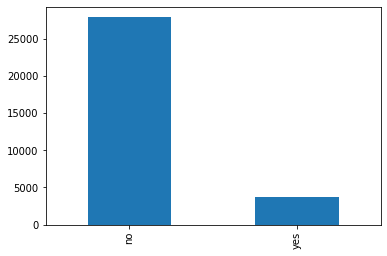

In [13]:
train['subscribed'].value_counts().plot.bar()

#### So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.
#### Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.

In [14]:
train['age'].value_counts()

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
94       1
93       1
90       1
95       1
Name: age, Length: 76, dtype: int64

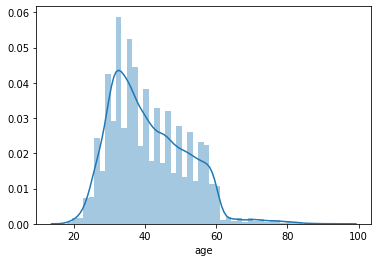

In [15]:
sns.distplot(train['age'])

#### We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

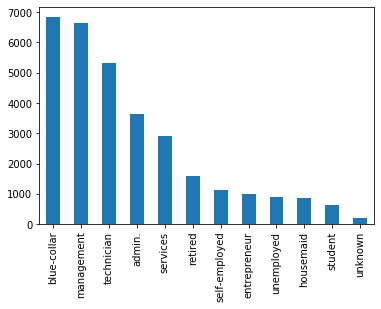

In [16]:
train['job'].value_counts().plot.bar()

#### We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

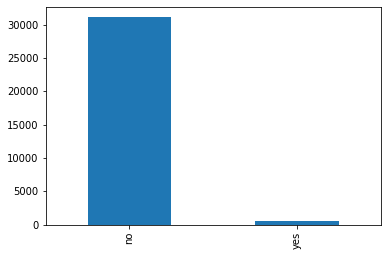

In [17]:
train['default'].value_counts().plot.bar()

#### More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

### Bivariate analysis

In [18]:
pd.crosstab(train['job'],train['subscribed'])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


Text(0, 0.5, 'Percentage')

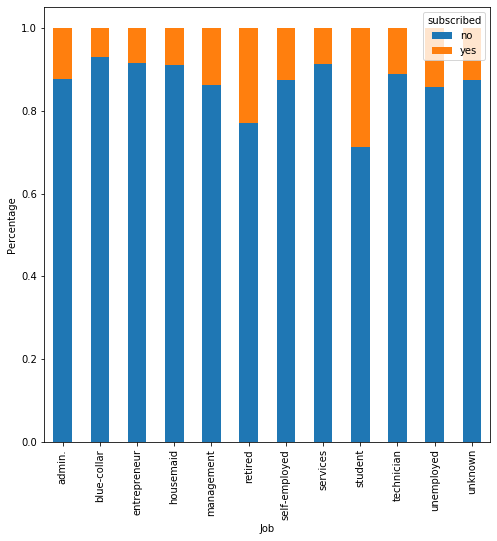

In [19]:
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

#### From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.
#### Next, let's explore the default variable against the subscribed variable.

In [20]:
pd.crosstab(train['default'],train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


Text(0, 0.5, 'Percentage')

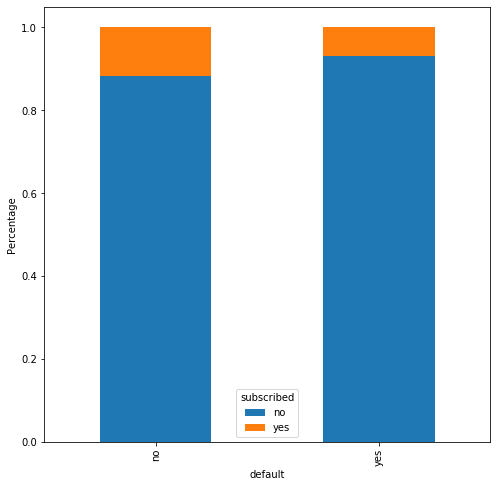

In [21]:
job=pd.crosstab(train['default'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

#### We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

#### Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [22]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [23]:
corr=train.corr()

In [24]:
mask=np.array(corr)

In [25]:
mask[np.tril_indices_from(mask)]= False

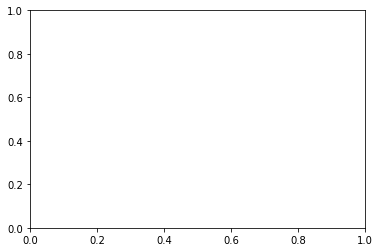

In [26]:
fig,ax=plt.subplots()

In [27]:
fig.set_size_inches(20,10)

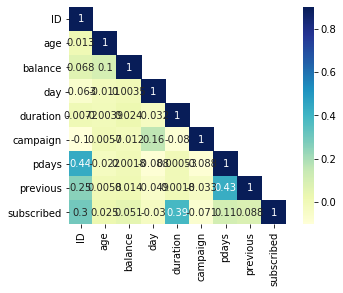

In [28]:
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

#### We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.
#### Next we will look for any missing values in the dataset.

In [29]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

#### There are no missing values in the train dataset. 
#### Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.
#### As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

## Model Building 


In [30]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [31]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

#### Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [32]:
from sklearn.model_selection import train_test_split

#### splitting into train and validation with 20% data in validation set and 80% data in train set.

In [33]:
x_train,x_val,y_train,y_val = train_test_split(train,target,test_size=0.2,random_state=32)

#### Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression 

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg=LogisticRegression()

In [36]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred=logreg.predict(x_val)

#### since we have fiited the models and also made predictions using Logistic Regression, lets check the accuracy on the validation set.

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_val,pred)

0.8916271721958926

#### We got an accuracy score of around 89% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.
#### Let's try decision tree algorithm now to check if we get better accuracy with that.

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf=DecisionTreeClassifier(max_depth = 4, random_state= 32)

In [42]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [43]:
predict=clf.predict(x_val)

In [44]:
accuracy_score(y_val,predict)

0.9075829383886256

#### As compared to Logistic Regression we get more accurate score i.e. around 91%
#### So we can say that decision tree is better model among the two for predicting accuracy of this dataset.
### Thank you 